# Метод ветвей и границ(Акулич Кирилл)

# Постановка задачи:
Находение оптимального целисленного решения задаччи ЛП

# Описание алгоритма:
Описание алгоритма  поясним на примере

![](p1.png)

Оптимальное вещественное решение данной задачи представим графически

![](p2.png)

![](p3.png)

![](p4.png)

![](p5.png)

Выполняя данные действия на каждом шаге получим граф вычислений

![](p6.png)

# Код решеия задачи

Подключаем библиотеки для нахождеия оптимального решения задач линейного программирования

In [1]:
from scipy.optimize import linprog

# Код рекурсивной функции для решеия задачи

In [1]:

import math
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

def zeros(length):
    return [0 for _ in range(length)]

def borders_and_branches_algorithm(c,lhs_ineq,rhs_ineq,bnd):
    def get_node_label_from_solution(opt_sol):
            ans = str(opt_sol.fun) if opt_sol.success else "NA"
            return str(opt_sol.x)+":"+ ans
    
    print("Left A:" + str(lhs_ineq))
    print("Right A:"+str(rhs_ineq))
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,
              method="revised simplex")
    
    parent_str = get_node_label_from_solution(opt)
    G.add_node(parent_str)
    #if opt_old is not None:
    #    G.add_edge(opt_old,str(opt.x)+" "+ str(opt.func))

    print(opt)
    if not opt.success:
        opt.fun =  float('inf')
        return opt

    x_values = opt.x
    print("============================" )
    min_solutions=[]
    for i,x in enumerate(x_values):
        if x.is_integer():
            continue
        ceil_lhs_ineq = lhs_ineq.copy()
        ceil_lhs_ineq_row = zeros(len(c))
        ceil_lhs_ineq_row[i] = -1
        ceil_lhs_ineq.append(ceil_lhs_ineq_row)
        ceil_rhs_ineq = rhs_ineq.copy()
        ceil_rhs_ineq.append((-1)* math.ceil(x))
        ceil_solution = borders_and_branches_algorithm(c,ceil_lhs_ineq, ceil_rhs_ineq,bnd)
        G.add_edge(parent_str, get_node_label_from_solution(ceil_solution))

        floor_lhs_ineq = lhs_ineq.copy()
        floor_lhs_ineq_row = zeros(len(c))
        floor_lhs_ineq_row[i] = 1
        floor_lhs_ineq.append(floor_lhs_ineq_row)
        floor_rhs_ineq = rhs_ineq.copy()
        floor_rhs_ineq.append(math.floor(x))
        floor_solution = borders_and_branches_algorithm(c,floor_lhs_ineq, floor_rhs_ineq,bnd)
        G.add_edge(parent_str, get_node_label_from_solution(floor_solution))

        if floor_solution.fun > ceil_solution.fun:
            min_solutions.append(ceil_solution)
        else:
            min_solutions.append(floor_solution)
    
    if len(min_solutions) == 0:
        return opt

    return min(min_solutions,key=lambda x: x.fun)

# Тестовые примеры(все примеры приведены к нормальной форме)

![](p7.png)

In [3]:
# function to optimaze params
obj  = [-1,-1]

# constraint matrix
lhs_ineq = [[ 2,  11], 
            [1,  1],  
            [ 4, -5]]

rhs_ineq = [ 38,  # правая сторона красного неравенства
            7,  # правая сторона синего неравенства
            5]

bnd = [(0, float("inf")),  # x1 x2 constraints 
       (0, float("inf"))] 
       
print(borders_and_branches_algorithm(obj,lhs_ineq,rhs_ineq,bnd))


Left A:[[2, 11], [1, 1], [4, -5]]
Right A:[38, 7, 5]
     con: array([], dtype=float64)
     fun: -7.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 1.00000000e+00,  0.00000000e+00, -1.77635684e-15])
  status: 0
 success: True
       x: array([4.44444444, 2.55555556])
Left A:[[2, 11], [1, 1], [4, -5], [-1, 0]]
Right A:[38, 7, 5, -5]
     con: array([], dtype=float64)
     fun: -7.0
 message: 'The problem appears infeasible, as the phase one auxiliary problem terminated successfully with a residual of 5.0e+00, greater than the tolerance 1e-12 required for the solution to be considered feasible. Consider increasing the tolerance to be greater than 5.0e+00. If this tolerance is unnaceptably large, the problem is likely infeasible.'
     nit: 1
   slack: array([ 6.,  0., -5.,  0.])
  status: 2
 success: False
       x: array([5., 2.])
Left A:[[2, 11], [1, 1], [4, -5], [1, 0]]
Right A:[38, 7, 5, 4]
     con: array([], dtype=float64)
     fun: -6.72727272727

![](p8.png)

In [4]:
obj  = [-7,-9]

# constraint matrix
lhs_ineq = [[ -1,  3], 
            [7,  1]]

rhs_ineq = [ 6, # правая сторона красного неравенства
            35]

bnd = [(0, float("inf")),  # x1 x2 constraints 
       (0, float("inf"))] 

print(borders_and_branches_algorithm(obj,lhs_ineq,rhs_ineq,bnd))

Left A:[[-1, 3], [7, 1]]
Right A:[6, 35]
     con: array([], dtype=float64)
     fun: -63.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([4.5, 3.5])
Left A:[[-1, 3], [7, 1], [-1, 0]]
Right A:[6, 35, -5]
     con: array([], dtype=float64)
     fun: -35.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([11.,  0.,  0.])
  status: 0
 success: True
       x: array([5., 0.])
Left A:[[-1, 3], [7, 1], [1, 0]]
Right A:[6, 35, 4]
     con: array([], dtype=float64)
     fun: -58.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.        , 3.66666667, 0.        ])
  status: 0
 success: True
       x: array([4.        , 3.33333333])
Left A:[[-1, 3], [7, 1], [1, 0], [0, -1]]
Right A:[6, 35, 4, -4]
     con: array([], dtype=float64)
     fun: -64.0
 message: 'The problem appears infeasible, as the phase one auxiliary problem terminated successfully with a

![](p9.png)

In [5]:
obj  = [2,3]

# constraint matrix
lhs_ineq = [[ 3,  5], 
            [3,  4],
            [0,1]]

rhs_ineq = [ 60, # правая сторона красного неравенства
            34,
            8]

bnd = [(0, float("inf")),  # x1 x2 constraints 
       (0, float("inf"))] 

print(borders_and_branches_algorithm(obj,lhs_ineq,rhs_ineq,bnd))

Left A:[[3, 5], [3, 4], [0, 1]]
Right A:[60, 34, 8]
     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([60., 34.,  8.])
  status: 0
 success: True
       x: array([0., 0.])
     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([60., 34.,  8.])
  status: 0
 success: True
       x: array([0., 0.])


![](p10.png)

Left A:[[3, 4], [2, 5]]
Right A:[24, 22]
     con: array([], dtype=float64)
     fun: -16.857142857142858
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([4.57142857, 2.57142857])
Left A:[[3, 4], [2, 5], [-1, 0]]
Right A:[24, 22, -5]
     con: array([], dtype=float64)
     fun: -16.75
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0.  , 0.75, 0.  ])
  status: 0
 success: True
       x: array([5.  , 2.25])
Left A:[[3, 4], [2, 5], [-1, 0], [0, -1]]
Right A:[24, 22, -5, -3]
     con: array([], dtype=float64)
     fun: -19.0
 message: 'The problem appears infeasible, as the phase one auxiliary problem terminated successfully with a residual of 6.0e+00, greater than the tolerance 1e-12 required for the solution to be considered feasible. Consider increasing the tolerance to be greater than 6.0e+00. If this tolerance is unnaceptably large, the problem is likely infeasible.'
    

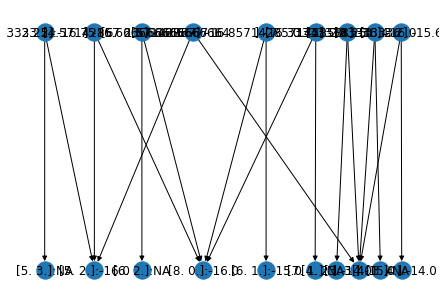

In [7]:
G = nx.DiGraph()

obj  = [-2,-3]

# constraint matrix
lhs_ineq = [[ 3,  4], 
            [2,  5]]

rhs_ineq = [ 24, # правая сторона красного неравенства
            22]

bnd = [(0, float("inf")),  # x1 x2 constraints 
       (0, float("inf"))] 
       
from networkx.drawing.nx_agraph import graphviz_layout

print(borders_and_branches_algorithm(obj,lhs_ineq,rhs_ineq,bnd))

pos=graphviz_layout(G, prog='dot')

nx.draw(G, pos, with_labels=True, arrows=True)

plt.show()

# Вывод 
В результате работы был получен алгоритм решающий целочисленную заду лп